In [56]:
import py3r.behaviour as py3r

In [57]:
from py3r.behaviour.util import three_d_utils as td

In [58]:
import os
os.getcwd()

'/Users/nata/FocusProject/FOCUS PROJECT GIT/3d_stuff'

In [59]:
"""td.extract_calibration_images("C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-1.avi", "C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-2.avi", "./left_output","./right_output", chessboard_size = (8,6),
min_sharpness=0,
max_anisotropy=10000,
min_edge_density=0.000001)"""

'td.extract_calibration_images("C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-1.avi", "C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-2.avi", "./left_output","./right_output", chessboard_size = (8,6),\nmin_sharpness=0,\nmax_anisotropy=10000,\nmin_edge_density=0.000001)'

In [60]:
#td.calibrate_stereo_system("./left_output","./right_output",(8,6),0.03, "./calibration.json")

In [61]:
from py3r.behaviour.tracking.tracking import LoadOptions as opt

options = opt(fps=30)

In [62]:
import json

with open('calibration.json') as f:
    calibration = json.load(f)

In [63]:
from py3r.behaviour.tracking.tracking_mv import TrackingMV as mv

test = mv.from_yolo3r({"left_output":"oft_tracking/Empty_Cage/Empty_Cage_Left/1_Empty_Cage_Left_Sync.csv", "right_output":"oft_tracking/Empty_Cage/Empty_Cage_Right/1_Empty_Cage_Right_Sync.csv"},"1_Empty_Cage_multiview",
                      options,calibration)

In [64]:
test.calibration

{'views': {'left_output': {'K': [[1258.4939885943727, 0.0, 655.3579291157758],
    [0.0, 1258.2801290096213, 509.1000476008892],
    [0.0, 0.0, 1.0]],
   'dist': [[-0.5515009811671181,
     0.5781636665271928,
     -0.001643548714124342,
     0.0037264487542169136,
     -0.40246624215916277]]},
  'right_output': {'K': [[1258.4939885943727, 0.0, 655.3579291157758],
    [0.0, 1258.2801290096213, 509.1000476008892],
    [0.0, 0.0, 1.0]],
   'dist': [[-0.5515009811671181,
     0.5781636665271928,
     -0.001643548714124342,
     0.0037264487542169136,
     -0.40246624215916277]]}},
 'relative_pose': {'R': [[0.9987219358926075,
    -0.0007670268613101093,
    -0.050536189376686386],
   [-0.0009897220653084478, 0.999396310897444, -0.034728003323152366],
   [0.0505323185412635, 0.03473363549030636, 0.9981182592000162]],
  'T': [[11.991812240469235], [0.6439511868380962], [1.239601519329197]]},
 'image_size': [1280, 1024],
 'view_order': ['left_output', 'right_output']}

In [65]:
test3d = test.stereo_triangulate()


In [66]:
test3d.data.head()

,mouse_top.mouse_top_0.hipr.x,mouse_top.mouse_top_0.hipr.y,mouse_top.mouse_top_0.hipr.z,mouse_top.mouse_top_0.hipr.likelihood,oft_3d.oft_3d_0.top_bl.x,oft_3d.oft_3d_0.top_bl.y,oft_3d.oft_3d_0.top_bl.z,oft_3d.oft_3d_0.top_bl.likelihood,mouse_top.mouse_top_0.headcentre.x,mouse_top.mouse_top_0.headcentre.y,...,mouse_top.mouse_top_0.tailtip.z,mouse_top.mouse_top_0.tailtip.likelihood,mouse_top.mouse_top_0.hipl.x,mouse_top.mouse_top_0.hipl.y,mouse_top.mouse_top_0.hipl.z,mouse_top.mouse_top_0.hipl.likelihood,oft_3d.oft_3d_0.top_br.x,oft_3d.oft_3d_0.top_br.y,oft_3d.oft_3d_0.top_br.z,oft_3d.oft_3d_0.top_br.likelihood
frame,,,,,,,,,,,,,,,,,,,,,
0,-4.572451,-0.384620,-39.823196,0.991660,NaN,NaN,NaN,NaN,-2.956125,0.661536,...,-40.603134,0.968371,-3.369111,-0.634645,-39.940948,0.990868,NaN,NaN,NaN,NaN
1,-4.543757,-0.404621,-39.828449,0.982737,NaN,NaN,NaN,NaN,-3.037738,0.704866,...,-40.407459,0.918192,-3.345030,-0.649570,-40.035324,0.986213,NaN,NaN,NaN,NaN
2,-4.532341,-0.398691,-39.798447,0.993301,NaN,NaN,NaN,NaN,-3.180723,0.707178,...,-40.489090,0.919053,-3.322074,-0.667130,-40.176029,0.994684,NaN,NaN,NaN,NaN
3,-4.508412,-0.420558,-39.862801,0.994313,NaN,NaN,NaN,NaN,-3.372048,0.661076,...,-40.510830,0.900391,-3.304535,-0.671159,-40.133759,0.995407,NaN,NaN,NaN,NaN
4,-4.490048,-0.439867,-39.943195,0.994559,NaN,NaN,NaN,NaN,-3.513296,0.588129,...,-40.421158,0.898111,-3.301585,-0.674985,-40.125671,0.995498,NaN,NaN,NaN,NaN


In [67]:
test3dcol = py3r.TrackingCollection.from_yolo3r_folder("./oft_tracking/Empty_Cage/collection_test/",options,py3r.TrackingMV)

Scanning ./oft_tracking/Empty_Cage/collection_test/ for recordings...
  Checking ./oft_tracking/Empty_Cage/collection_test/video_1_3dset...


In [68]:
test3dcol_tri = test3dcol.stereo_triangulate()

In [69]:
test3dcol_tri.strip_column_names()

{'video_1_3dset': None}

In [70]:
test3dcol_tri.get_point_names()

{'video_1_3dset': ['tl',
  'earr',
  'br',
  'tailtip',
  'hipl',
  'bodycentre',
  'top_bl',
  'bcr',
  'top_br',
  'bcl',
  'tailbase',
  'nose',
  'bl',
  'tailcentre',
  'top_tr',
  'earl',
  'neck',
  'tr',
  'headcentre',
  'hipr',
  'top_tl']}


Collection: <function BaseCollection.__getattr__.<locals>.batch_method at 0x3176822a0>


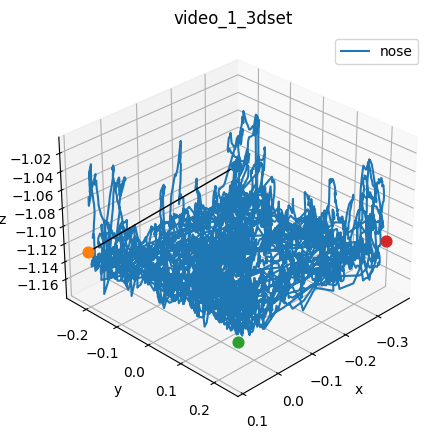

In [72]:
test3dcol_tri.plot(trajectories=["nose"], static=["tl", "tr", "br", "bl"], lines = [("tl", "tr")], dims=("x", "y", "z"))

In [71]:
py3r.Tracking.rescale_by_known_distance

test3dcol_tri.rescale_by_known_distance("tl","br", 0.64, dims = ("x","y","z"))

{'video_1_3dset': None}